<a href="https://colab.research.google.com/github/kashish1720/mldl_lab_sem6/blob/main/exp1/mldl_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== LINEAR REGRESSION RESULTS =====
MAE: 0.41749050153075906
MSE: 0.2612765457256682
RMSE: 0.5111521747245806
R2 Score: 0.9957516008825095


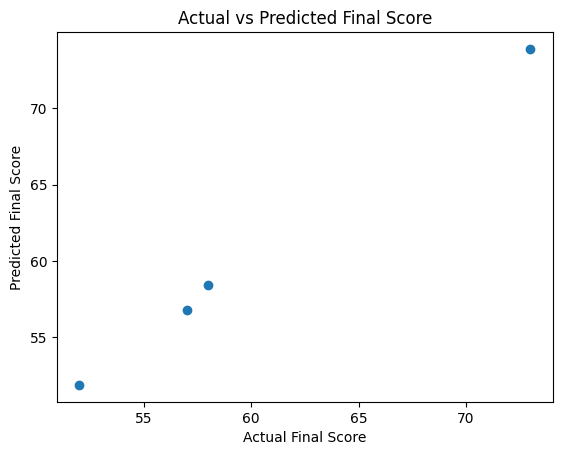


===== LOGISTIC REGRESSION RESULTS =====
Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



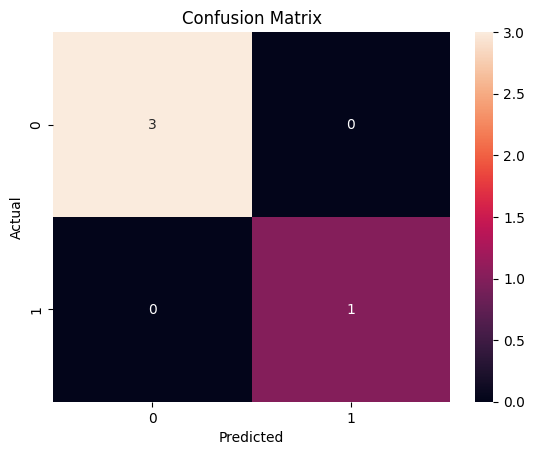

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



===== HYPERPARAMETER TUNING =====
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best Cross Validation Accuracy: 1.0


In [8]:
# ==============================
# STEP 1: Import Libraries
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

# ==============================
# STEP 2: Load Dataset
# ==============================
data = pd.read_csv("/content/sample_data/student_performance.csv")
data.head()

# ==============================
# STEP 3: Data Cleaning
# ==============================
# Dataset has no missing values, but kept for safety
data = data.dropna()

# ==============================
# PART A: LINEAR REGRESSION
# ==============================
X = data.drop(columns=["Final_Score"])
y = data["Final_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("\n===== LINEAR REGRESSION RESULTS =====")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Final Score")
plt.show()

# ==============================
# PART B: LOGISTIC REGRESSION
# ==============================
# Create a binary target variable
data["Pass"] = data["Final_Score"].apply(lambda x: 1 if x >= 65 else 0)

X = data.drop(columns=["Final_Score", "Pass"])
y = data["Pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("\n===== LOGISTIC REGRESSION RESULTS =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ==============================
# PART C: HYPERPARAMETER TUNING
# ==============================
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)

print("\n===== HYPERPARAMETER TUNING =====")
print("Best Parameters:", grid.best_params_)
print("Best Cross Validation Accuracy:", grid.best_score_)


In [ ]:
!ls


sample_data
